In [57]:
from sentinelsat import SentinelAPI
import geopandas as gpd 
import folium
import rasterio as rio
import rasterio.mask
from rasterio.plot import show
from shapely.geometry import MultiPolygon, Polygon
import matplotlib.pyplot as plt

In [33]:
user = 'ramyaragupathy'
password = 'a1s2d3f4g5'
api = SentinelAPI(user, password, 'https://scihub.copernicus.eu/dhus')

In [34]:
nReserve = gpd.read_file('NReserve/NaturalReserve_Polygon.shp')
m = folium.Map([41.7023292727353, 12.34697305914639], zoom_start=12)
folium.GeoJson(nReserve).add_to(m)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


In [35]:
m

In [36]:
footprint = None
for i in nReserve['geometry']:
    footprint = i

In [37]:
products = api.query(footprint,
                     date = ('20190601', '20190626'),
                     platformname = 'Sentinel-2',
                     processinglevel = 'Level-2A',
                     cloudcoverpercentage = (0,10)
                    )

In [38]:
products_gdf = api.to_geodataframe(products)
products_gdf_sorted = products_gdf.sort_values(['cloudcoverpercentage'], ascending=[True])
products_gdf_sorted

,title,link,link_alternative,link_icon,summary,beginposition,endposition,ingestiondate,orbitnumber,relativeorbitnumber,...,processingbaseline,processinglevel,producttype,platformname,size,filename,level1cpdiidentifier,identifier,uuid,geometry
16e95baf-bbcb-43fe-ab67-5fecea2ffde5,S2B_MSIL2A_20190605T100039_N0212_R122_T33TTG_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-06-05T10:00:39.024Z, Instrument: MS...",2019-06-05 10:00:39.024,2019-06-05 10:00:39.024,2019-06-05 21:54:46.895,11731,122,...,02.12,Level-2A,S2MSI2A,Sentinel-2,1006.25 MB,S2B_MSIL2A_20190605T100039_N0212_R122_T33TTG_2...,S2B_OPER_MSI_L1C_TL_SGS__20190605T134619_A0117...,S2B_MSIL2A_20190605T100039_N0212_R122_T33TTG_2...,16e95baf-bbcb-43fe-ab67-5fecea2ffde5,"MULTIPOLYGON (((11.41073 41.40773, 12.72303 41..."
590a4ce9-c540-4cb9-844b-3ee1efff8ca9,S2B_MSIL2A_20190605T100039_N0212_R122_T32TQM_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-06-05T10:00:39.024Z, Instrument: MS...",2019-06-05 10:00:39.024,2019-06-05 10:00:39.024,2019-06-05 22:16:12.999,11731,122,...,02.12,Level-2A,S2MSI2A,Sentinel-2,1009.58 MB,S2B_MSIL2A_20190605T100039_N0212_R122_T32TQM_2...,S2B_OPER_MSI_L1C_TL_SGS__20190605T134619_A0117...,S2B_MSIL2A_20190605T100039_N0212_R122_T32TQM_2...,590a4ce9-c540-4cb9-844b-3ee1efff8ca9,"MULTIPOLYGON (((12.70556 41.40403, 12.76314 42..."
d1a70889-1d44-414c-a357-08a7185c04b4,S2B_MSIL2A_20190625T100039_N0212_R122_T33TTG_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-06-25T10:00:39.024Z, Instrument: MS...",2019-06-25 10:00:39.024,2019-06-25 10:00:39.024,2019-06-25 19:50:05.133,12017,122,...,02.12,Level-2A,S2MSI2A,Sentinel-2,941.03 MB,S2B_MSIL2A_20190625T100039_N0212_R122_T33TTG_2...,S2B_OPER_MSI_L1C_TL_EPAE_20190625T123721_A0120...,S2B_MSIL2A_20190625T100039_N0212_R122_T33TTG_2...,d1a70889-1d44-414c-a357-08a7185c04b4,"MULTIPOLYGON (((11.41073 41.40773, 12.72303 41..."
a24e1e2c-da6a-4f2b-b19b-b97cfe4fbbe8,S2B_MSIL2A_20190625T100039_N0212_R122_T32TQM_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-06-25T10:00:39.024Z, Instrument: MS...",2019-06-25 10:00:39.024,2019-06-25 10:00:39.024,2019-06-25 19:48:59.153,12017,122,...,02.12,Level-2A,S2MSI2A,Sentinel-2,948.75 MB,S2B_MSIL2A_20190625T100039_N0212_R122_T32TQM_2...,S2B_OPER_MSI_L1C_TL_EPAE_20190625T123721_A0120...,S2B_MSIL2A_20190625T100039_N0212_R122_T32TQM_2...,a24e1e2c-da6a-4f2b-b19b-b97cfe4fbbe8,"MULTIPOLYGON (((12.70556 41.40403, 12.76314 42..."
c9e76145-3270-458c-9927-49d1354be29e,S2A_MSIL2A_20190620T100031_N0212_R122_T32TQM_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-06-20T10:00:31.024Z, Instrument: MS...",2019-06-20 10:00:31.024,2019-06-20 10:00:31.024,2019-06-20 22:10:21.392,20854,122,...,02.12,Level-2A,S2MSI2A,Sentinel-2,967.74 MB,S2A_MSIL2A_20190620T100031_N0212_R122_T32TQM_2...,S2A_OPER_MSI_L1C_TL_MPS__20190620T121338_A0208...,S2A_MSIL2A_20190620T100031_N0212_R122_T32TQM_2...,c9e76145-3270-458c-9927-49d1354be29e,"MULTIPOLYGON (((12.70556 41.40403, 12.76314 42..."
3155fa67-c0d6-4c0f-a556-f5e0ee532c9d,S2A_MSIL2A_20190620T100031_N0212_R122_T33TTG_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-06-20T10:00:31.024Z, Instrument: MS...",2019-06-20 10:00:31.024,2019-06-20 10:00:31.024,2019-06-20 22:03:54.767,20854,122,...,02.12,Level-2A,S2MSI2A,Sentinel-2,961.06 MB,S2A_MSIL2A_20190620T100031_N0212_R122_T33TTG_2

In [12]:
api.download("16e95baf-bbcb-43fe-ab67-5fecea2ffde5")

Downloading: 100%|██████████| 1.06G/1.06G [05:26<00:00, 3.23MB/s]
MD5 checksumming: 100%|██████████| 1.06G/1.06G [00:04<00:00, 252MB/s]


{'id': '16e95baf-bbcb-43fe-ab67-5fecea2ffde5',
 'title': 'S2B_MSIL2A_20190605T100039_N0212_R122_T33TTG_20190605T143319',
 'size': 1055191497,
 'md5': 'CE4FBC92040E79591C7380F7B159B5C3',
 'date': datetime.datetime(2019, 6, 5, 10, 0, 39, 24000),
 'footprint': 'POLYGON((11.354954233772318 42.39470139413761,12.687592758603905 42.42936087235922,12.723033432665233 41.441212166985935,11.410731332148327 41.407726190110715,11.354954233772318 42.39470139413761))',
 'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('16e95baf-bbcb-43fe-ab67-5fecea2ffde5')/$value",
 'Online': True,
 'Creation Date': datetime.datetime(2019, 6, 5, 21, 55, 17, 343000),
 'Ingestion Date': datetime.datetime(2019, 6, 5, 21, 54, 46, 895000),
 'path': './S2B_MSIL2A_20190605T100039_N0212_R122_T33TTG_20190605T143319.zip',
 'downloaded_bytes': 1055191497}

In [17]:
R10 = 'S2B_MSIL2A_20190605T100039_N0212_R122_T33TTG_20190605T143319.SAFE/GRANULE/L2A_T33TTG_A011731_20190605T100530/IMG_DATA/R10m'
b4 = rio.open(R10+'/T33TTG_20190605T100039_B04_10m.jp2')
b3 = rio.open(R10+'/T33TTG_20190605T100039_B03_10m.jp2')
b2 = rio.open(R10+'/T33TTG_20190605T100039_B02_10m.jp2')


# Create an RGB image 
with rio.open('RGB.tiff','w',driver='Gtiff', width=b4.width, height=b4.height, 
              count=3,crs=b4.crs,transform=b4.transform, dtype=b4.dtypes[0]) as rgb:
    rgb.write(b2.read(1),1) 
    rgb.write(b3.read(1),2) 
    rgb.write(b4.read(1),3) 
    rgb.close()

In [20]:
nReserve_proj = nReserve.to_crs({'init': 'epsg:32633'})

with rio.open("RGB.tiff") as src:
    out_image, out_transform = rio.mask.mask(src, nReserve_proj.geometry,crop=True)
    out_meta = src.meta.copy()
    out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})
    
with rasterio.open("RGB_masked.tif", "w", **out_meta) as dest:
    dest.write(out_image)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


In [39]:
b4 = rio.open(R10+'/T33TTG_20190605T100039_B04_10m.jp2')
b8 = rio.open(R10+'/T33TTG_20190605T100039_B08_10m.jp2')

# read Red(b4) and NIR(b8) as arrays
red = b4.read()
nir = b8.read()

# Calculate ndvi
ndvi = (nir.astype(float)-red.astype(float))/(nir+red)

# Write the NDVI image
meta = b4.meta
meta.update(driver='GTiff')
meta.update(dtype=rasterio.float32)

with rasterio.open('NDVI.tif', 'w', **meta) as dst:
    dst.write(ndvi.astype(rasterio.float32))

In [40]:
R10 = 'S2B_MSIL2A_20190605T100039_N0212_R122_T33TTG_20190605T143319.SAFE/GRANULE/L2A_T33TTG_A011731_20190605T100530/IMG_DATA/R10m'

b4 = rio.open(R10+'/T33TTG_20190605T100039_B04_10m.jp2')
b3 = rio.open(R10+'/T33TTG_20190605T100039_B03_10m.jp2')
b2 = rio.open(R10+'/T33TTG_20190605T100039_B02_10m.jp2')

In [41]:
b4.count, b4.width, b4.height

(1, 10980, 10980)

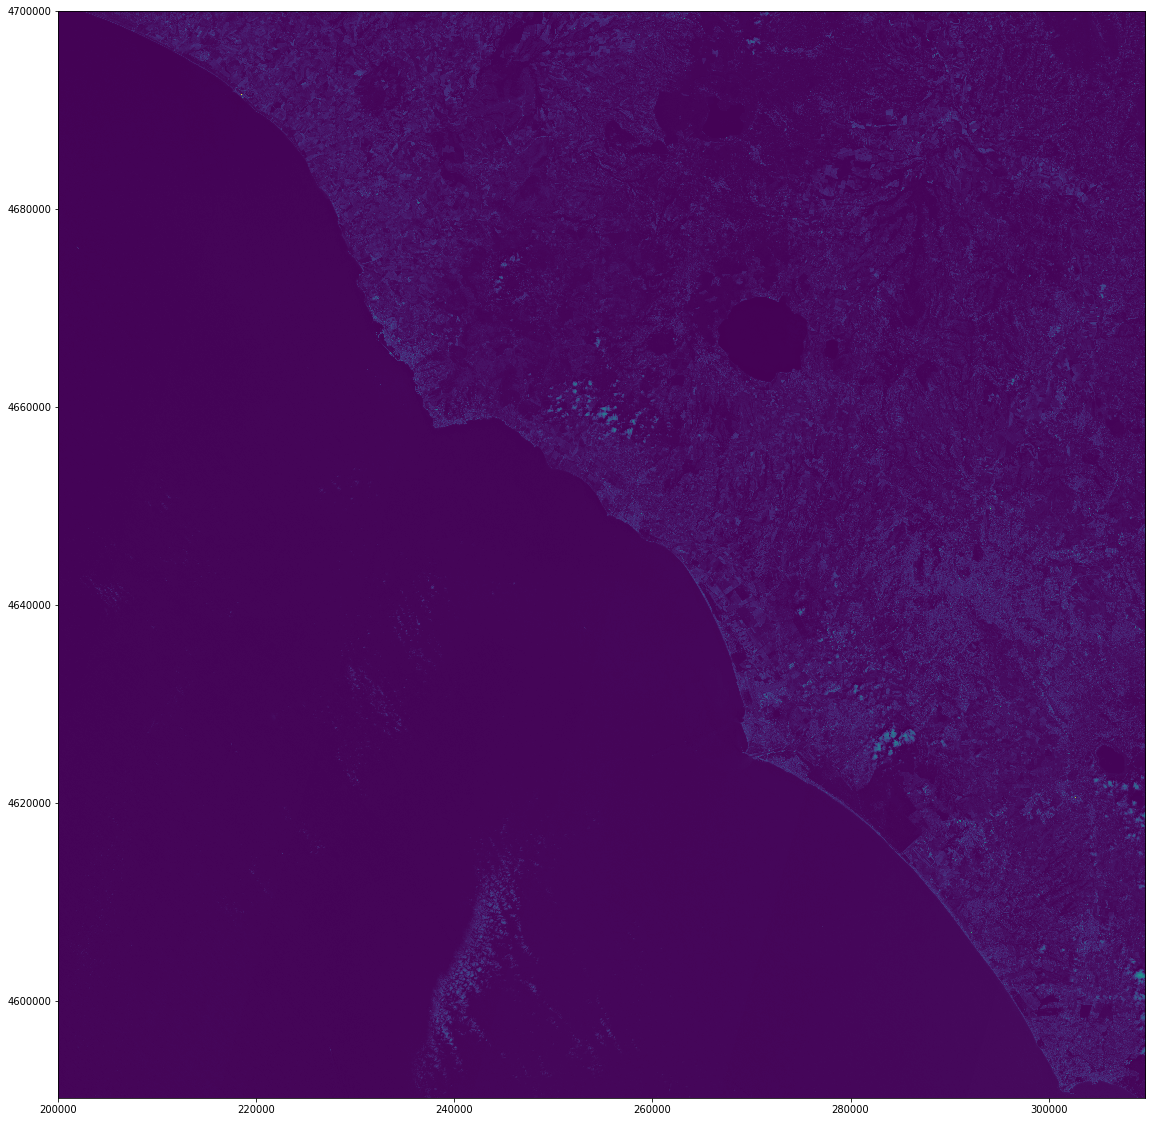

In [58]:
fig, ax = plt.subplots(1, figsize=(20, 20))
show(b4, ax=ax)
plt.show()

In [48]:
with rio.open('RGB.tiff','w',driver='Gtiff', width=b4.width, height=b4.height, 
              count=3,crs=b4.crs,transform=b4.transform, dtype=b4.dtypes[0]) as rgb:
    rgb.write(b2.read(1),1) 
    rgb.write(b3.read(1),2) 
    rgb.write(b4.read(1),3) 
    rgb.close()

In [51]:
#src = rio.open(r"RGB.tiff")
nReserve_proj = nReserve.to_crs({'init': 'epsg:32633'})

with rio.open("RGB.tiff") as src:
    out_image, out_transform = rio.mask.mask(src, nReserve_proj.geometry,crop=True)
    out_meta = src.meta.copy()
    out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})
    
with rasterio.open("RGB_masked.tif", "w", **out_meta) as dest:
    dest.write(out_image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


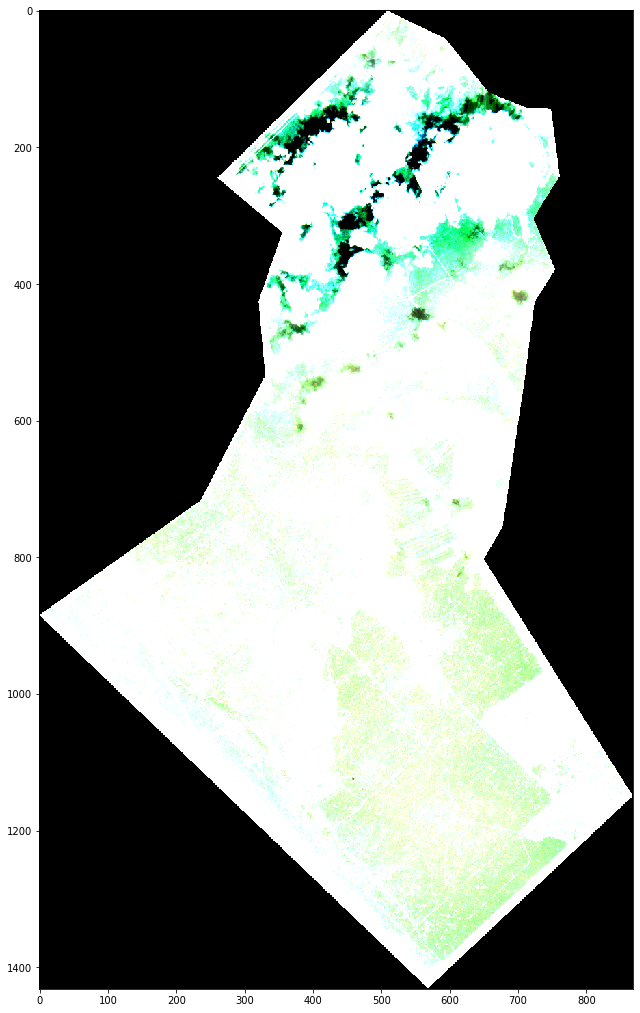

<function matplotlib.pyplot.show(*args, **kw)>

In [59]:
msk = rio.open(r"RGB_masked.tif")
fig, ax = plt.subplots(1, figsize=(18, 18))
show(msk.read([1,2,3]))
plt.show

In [60]:
b4 = rio.open(R10+'/T33TTG_20190605T100039_B04_10m.jp2')
b8 = rio.open(R10+'/T33TTG_20190605T100039_B08_10m.jp2')

In [61]:

red = b4.read()
nir = b8.read()

In [62]:
ndvi = (nir.astype(float)-red.astype(float))/(nir+red)

In [63]:
meta = b4.meta

meta.update(driver='GTiff')
meta.update(dtype=rasterio.float32)

with rasterio.open('NDVI.tif', 'w', **meta) as dst:
    dst.write(ndvi.astype(rasterio.float32))